#Optics HomeWork 8: 4f Phase Contrast Optical System
##Question 2: Phase Contrast Imaging with a 4f-system
##Submitted By: Ramesh Bhatta


In [30]:
# Importing Packages

import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

<Figure size 700x900 with 0 Axes>

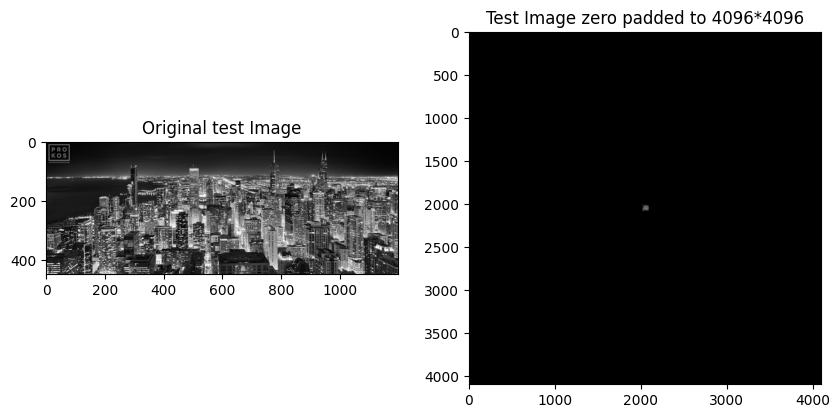

In [31]:
# Choosing an 8-bit picture
fig = plt.figure(figsize=(7,9))
image = cv2.imread('/content/drive/MyDrive/CHICAGO-PANORAMIC-SKYLINE-NIGHT-10.19-0107-1200PX.jpg',0)
original_image = image
image = cv2.resize(image, (72,72))
image = cv2.copyMakeBorder(image, 2012, 2012, 2012, 2012, cv2.BORDER_CONSTANT, (0,0,0))

fig = plt.figure(figsize=(10,10))
fig.add_subplot(121)
plt.imshow(original_image, cmap = 'gray')
plt.title("Original test Image")
fig.add_subplot(122)
plt.imshow(image, cmap = 'gray')
plt.title("Test Image zero padded to 4096*4096")
plt.show()

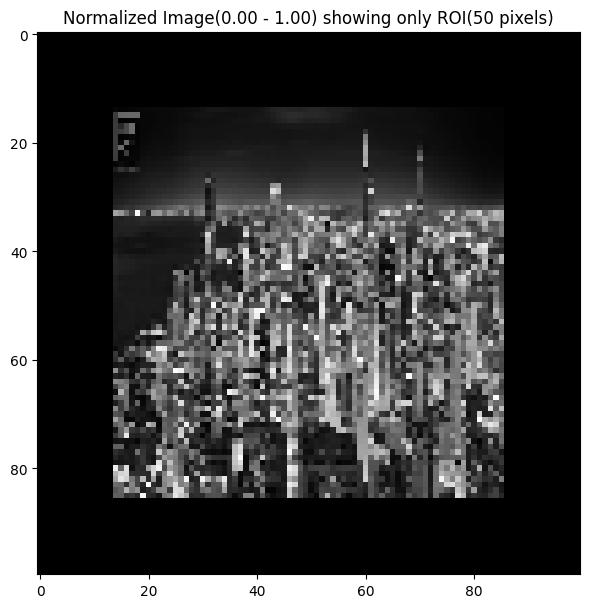

In [32]:
# Normalized photo
N = image.shape[0]
g = (image - np.min(image))/(np.max(image) - np.min(image))
fig = plt.figure(figsize = (7,9))
plt.imshow(g[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title("Normalized Image(0.00 - 1.00) showing only ROI(50 pixels)")
plt.show()

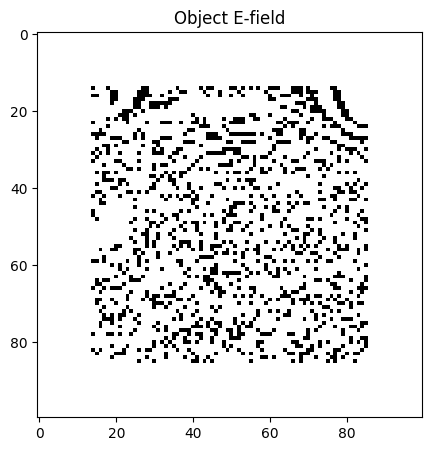

In [33]:
# Object Electric field: I am using epsilon = 0.3 because it is showing better visual results

epsilon = 0.3
beta = epsilon * g
E0 = np.exp(1j * beta)
fig = plt.figure(figsize = (5,5))
plt.imshow(np.abs(E0)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title("Object E-field")
plt.show()

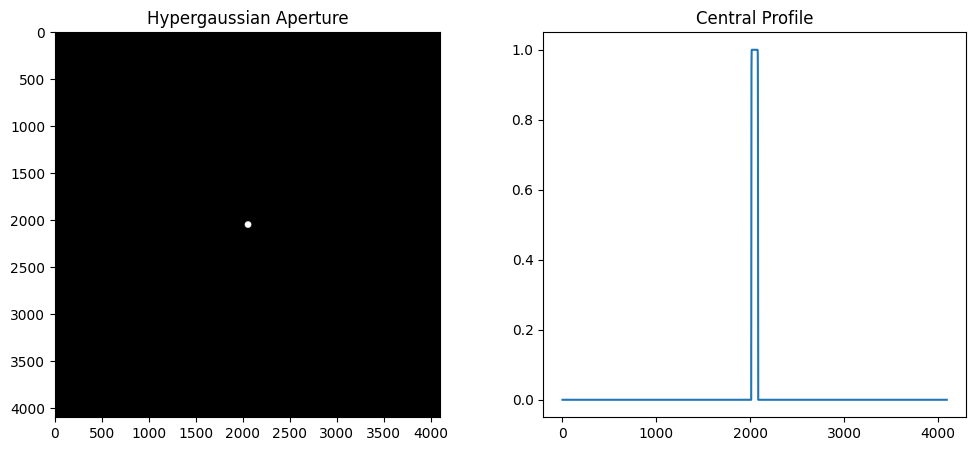

In [34]:
# Defining a Hypergaussian Aperture

def hypergaussian_aperture(N):
    """Returns a hypergaussian aperture function with radius r=sqrt(N/pi) pixels in an N*N image"""
    r = int(np.sqrt(N/np.pi))
    center = (N//2, N//2)
    aperture = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance = np.sqrt((i-center[0])**2 + (j-center[1])**2)
            if distance <= r:
                aperture[i,j] = np.exp(-((distance/r)**50))
    return aperture

#Plots
N = image.shape[0]
aperture = hypergaussian_aperture(N)
aperture = aperture/np.max(aperture)
profile = aperture[N//2,:]

fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
plt.imshow(aperture, cmap = 'gray')
plt.title("Hypergaussian Aperture")
fig.add_subplot(122)
plt.plot(profile)
plt.title("Central Profile")
plt.show()

## Question 2A:

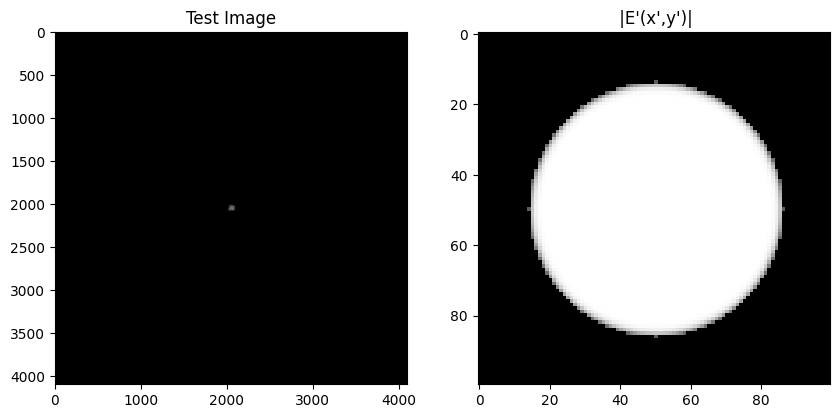

In [35]:
## A: E-field passing through hypergaussian aperture- Image Rendering(aperture size is around 25 pixels = sqrt(N/pi) for 2048*2048 image)

E = E0*aperture
E_fft = np.fft.fftshift(np.fft.fft2(E))

#Plots

fig = plt.figure(figsize=(10,10))
fig.add_subplot(121)
plt.imshow(beta, cmap = 'gray')
plt.title("Test Image")
fig.add_subplot(122)
plt.imshow(np.abs(E)[N//2-50:N//2+50,N//2-50:N//2+50], cmap ='gray')
plt.title(" |E'(x',y')|")
plt.show()

##Question 2B:

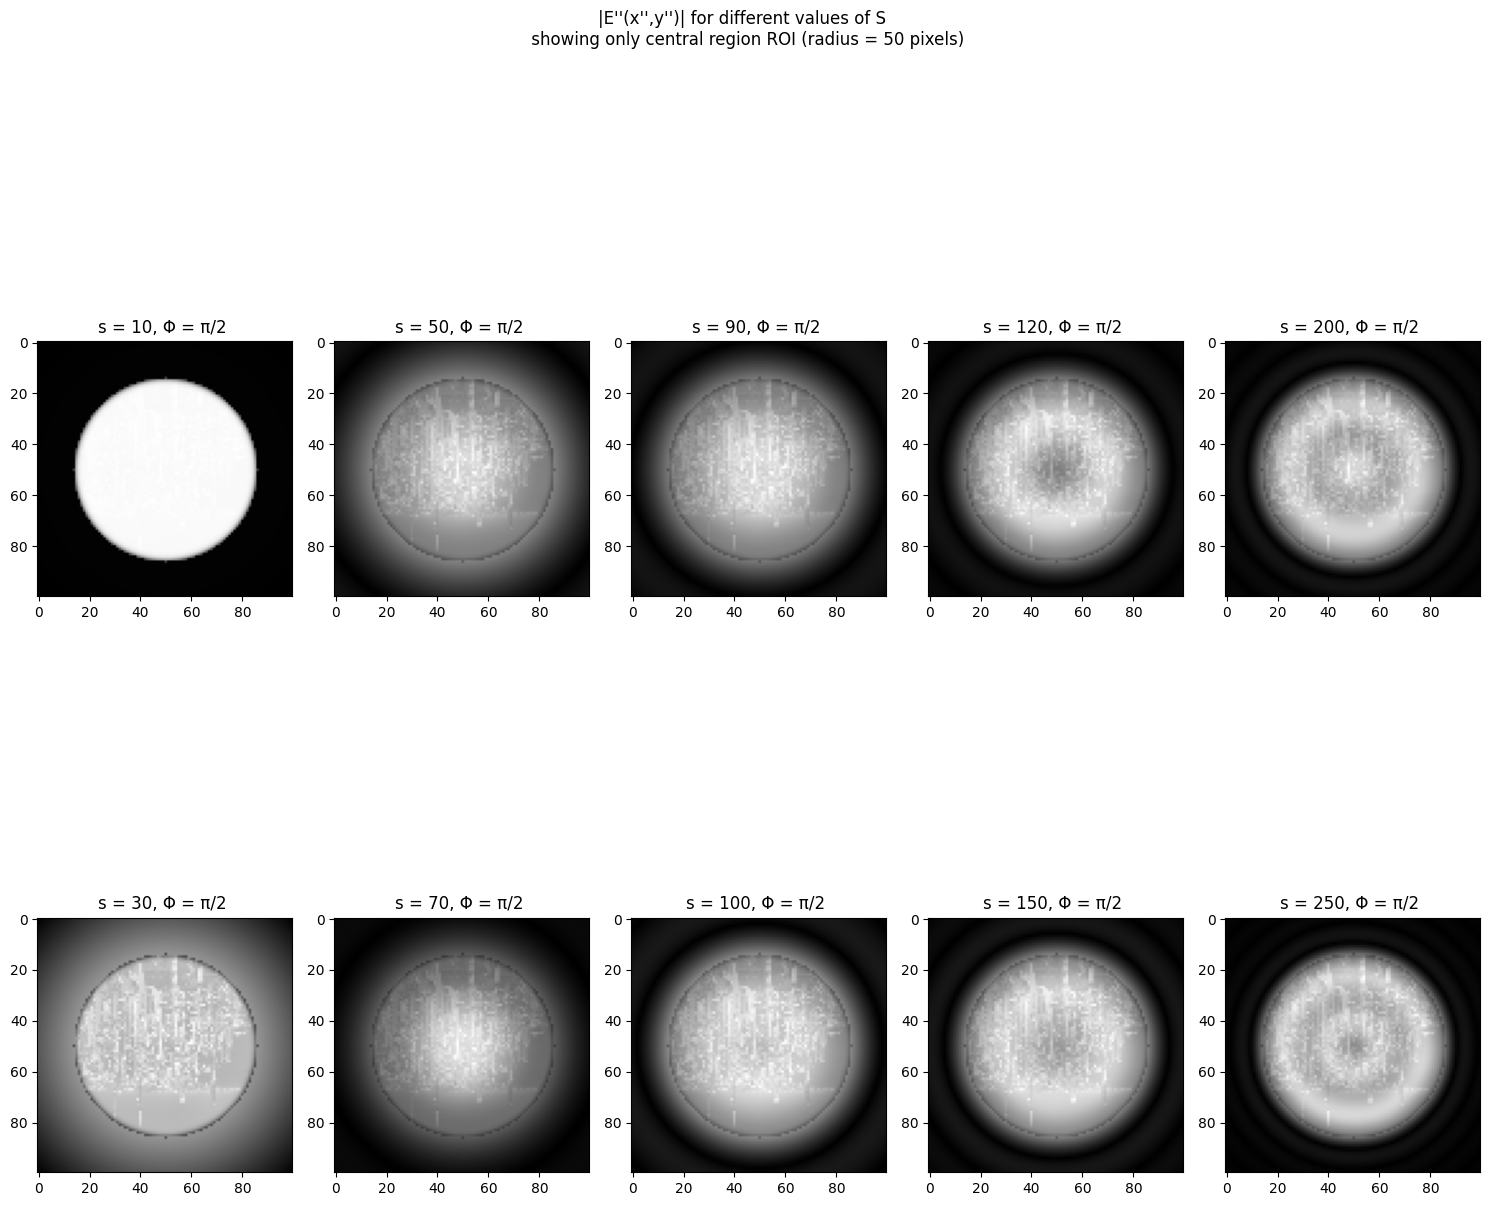

In [36]:
## B: Applying Phase Filter in Fourier Plane

# 1. Case: Phi = pi/2

def phase_filter(x,y,s,phi):

    r = np.sqrt(x**2 + y**2)
    t = np.zeros_like(x, dtype = np.complex128)
    t[(r) < s] = np.exp(1j * phi)
    t[(r) >= s ] = 1
    return t       

s = [10,30,50,70,90,100,120,150,200,250]
x = np.arange(-N/2, N/2,1)
y = np.arange(-N/2, N/2,1)
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15,15))
fig.suptitle("|E''(x'',y'')| for different values of S \n showing only central region ROI (radius = 50 pixels)")
for i in range(len(s)):
    row = i % 2
    col = i // 2
    t = phase_filter( X,Y,s[i], np.pi/2)
    E_filtered = t * E_fft
    E_filtered_FT = np.fft.fft2(E_filtered)
    axes[row, col].imshow((np.abs(E_filtered_FT))[N//2-50:N//2+50,N//2-50:N//2+50], cmap='gray')
    axes[row, col].set_title("s = {}, Φ = π/2 ".format(s[i]))

plt.tight_layout()
plt.show()    

##Question 2C:

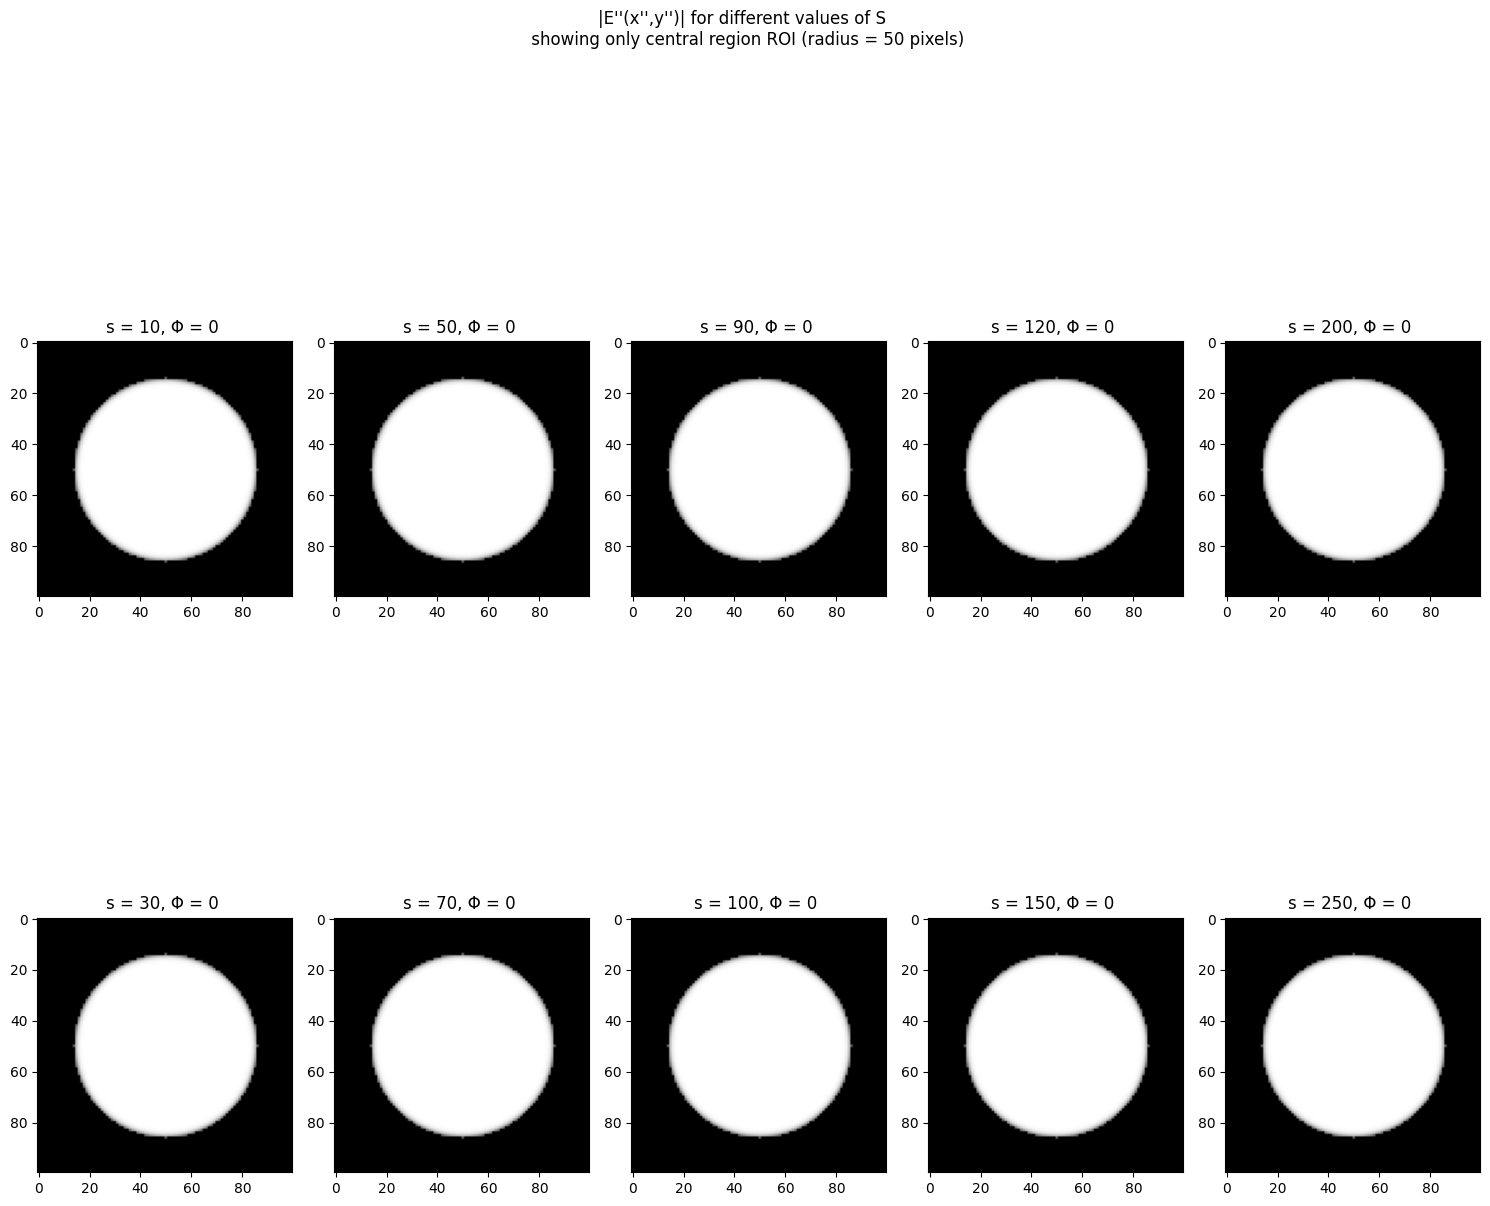

In [37]:
## C: when phi = 0

s = s = [10,30,50,70,90,100,120,150,200,250]
x = np.arange(-N/2, N/2,1)
y = np.arange(-N/2, N/2,1)
X, Y = np.meshgrid(x, y)
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15,15))
fig.suptitle("|E''(x'',y'')| for different values of S \n showing only central region ROI (radius = 50 pixels)")
for i in range(len(s)):
    row = i % 2
    col = i // 2
    t = phase_filter( X,Y,s[i], 0)
    E_filtered = t * E_fft
    E_filtered_FT = np.fft.fft2(E_filtered)
    axes[row, col].imshow(np.abs(E_filtered_FT)[N//2-50:N//2+50,N//2-50:N//2+50], cmap='gray')
    axes[row, col].set_title("s = {}, Φ = 0 ".format(s[i]))

plt.tight_layout()
plt.show()

##Question 2D:

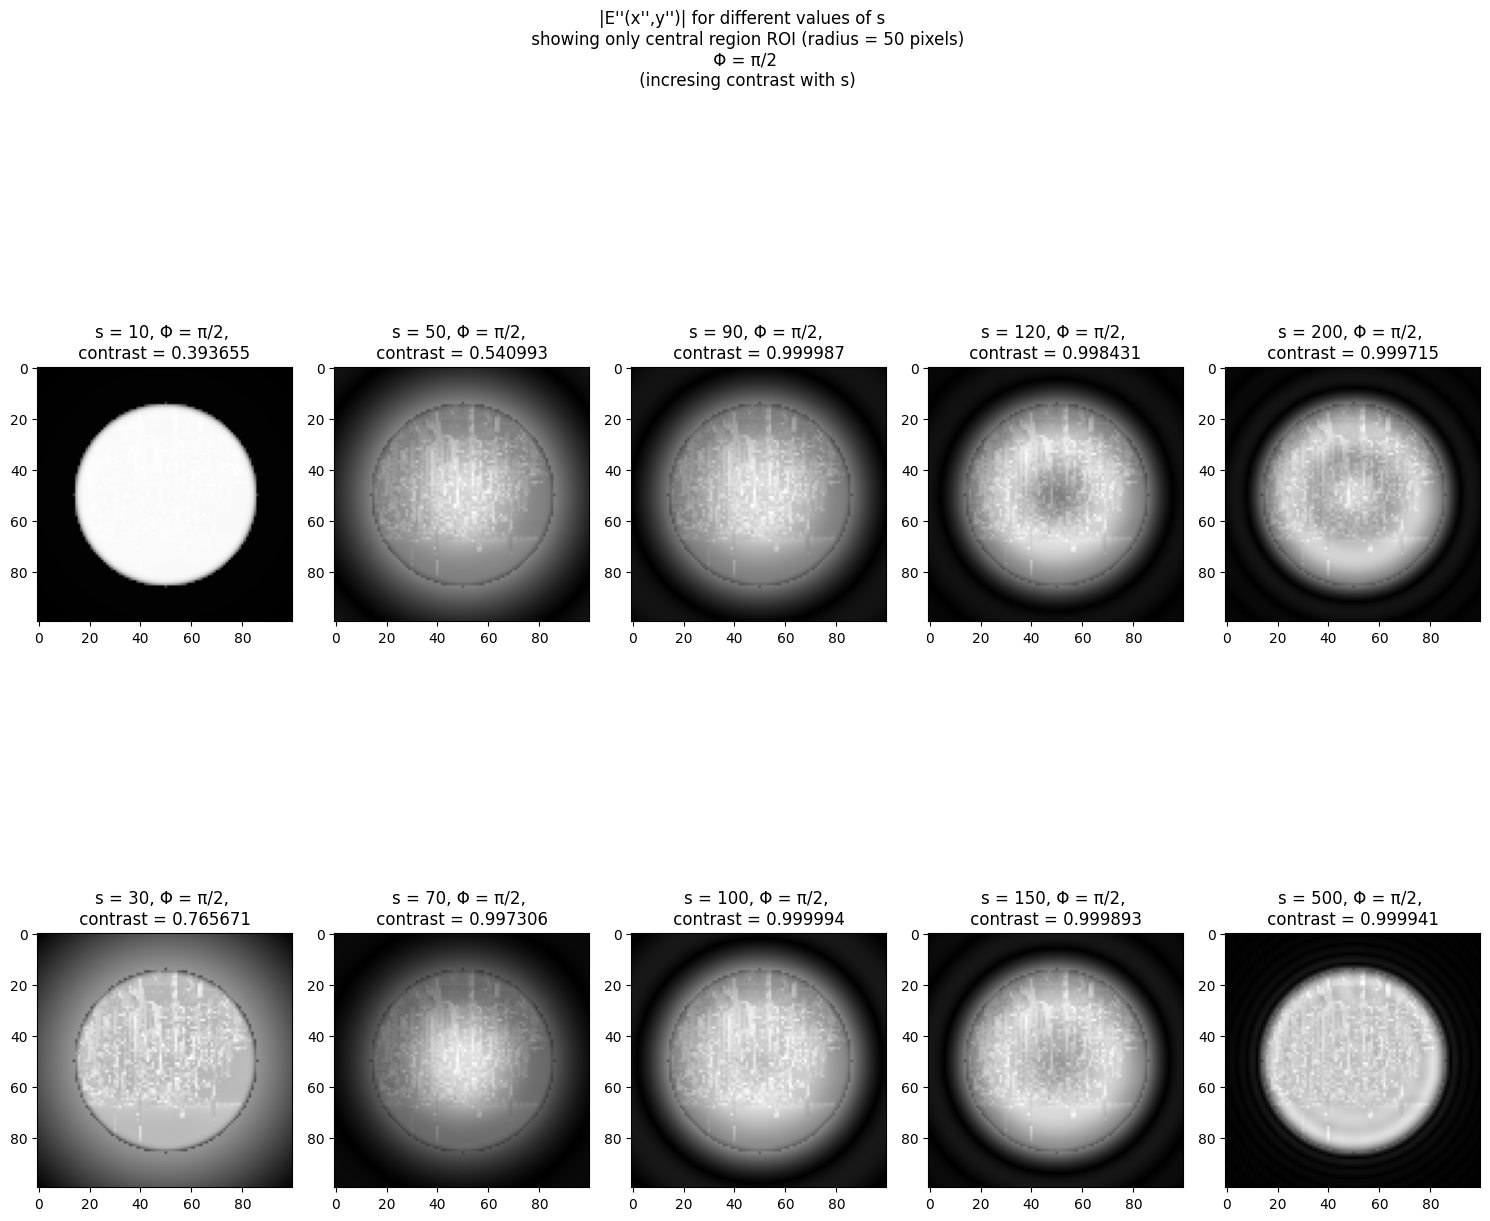

In [38]:
## D. Taking central region with radius = sqrt(N/pi) = 25 pixels and using it to calculate contrast in that region of the picture

## For case of part B, using only central region of interest and calculating contrast for each values of S used and showing them in the plot.

## 1. For phi = pi/2

s = [10,30,50,70,90,100,120,150,200,500]
c_value_1 = []
x = np.arange(-N/2, N/2,1)
y = np.arange(-N/2, N/2,1)
X, Y = np.meshgrid(x, y)
center = (256, 256)
radius = 13
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15,15))
fig.suptitle("|E''(x'',y'')| for different values of s \n showing only central region ROI (radius = 50 pixels)\n Φ = π/2 \n (incresing contrast with s)")
for i in range(len(s)):
    row = i % 2
    col = i // 2
    t = phase_filter( X,Y,s[i], np.pi/2)
    E_filtered = t * E_fft
    E_filtered_FT = np.fft.fft2(E_filtered)

    ## Creating a mask to compute contrast only over the ROI(r = 50 pixels)
    mask = np.zeros(abs(E_filtered_FT).shape[:2], dtype=np.uint8)
    cv2.circle(mask, center, radius, 1, -1)
    masked_img = cv2.bitwise_and(abs(E_filtered_FT) , abs(E_filtered_FT) , mask=mask)

    #Irradiance
    irradiance = (masked_img) ** 2
    min_v = np.min(irradiance[irradiance>0])
    max_v = np.max(irradiance)

    #Contrast
    contrast = round((max_v - min_v) / (max_v + min_v),6)
    c_value_1.append(contrast)
    axes[row, col].imshow((np.abs(E_filtered_FT))[N//2-50:N//2+50,N//2-50:N//2+50], cmap='gray')
    axes[row, col].set_title("s = {}, Φ = π/2, \n contrast = {} ".format(s[i],contrast))

plt.tight_layout()
plt.show()

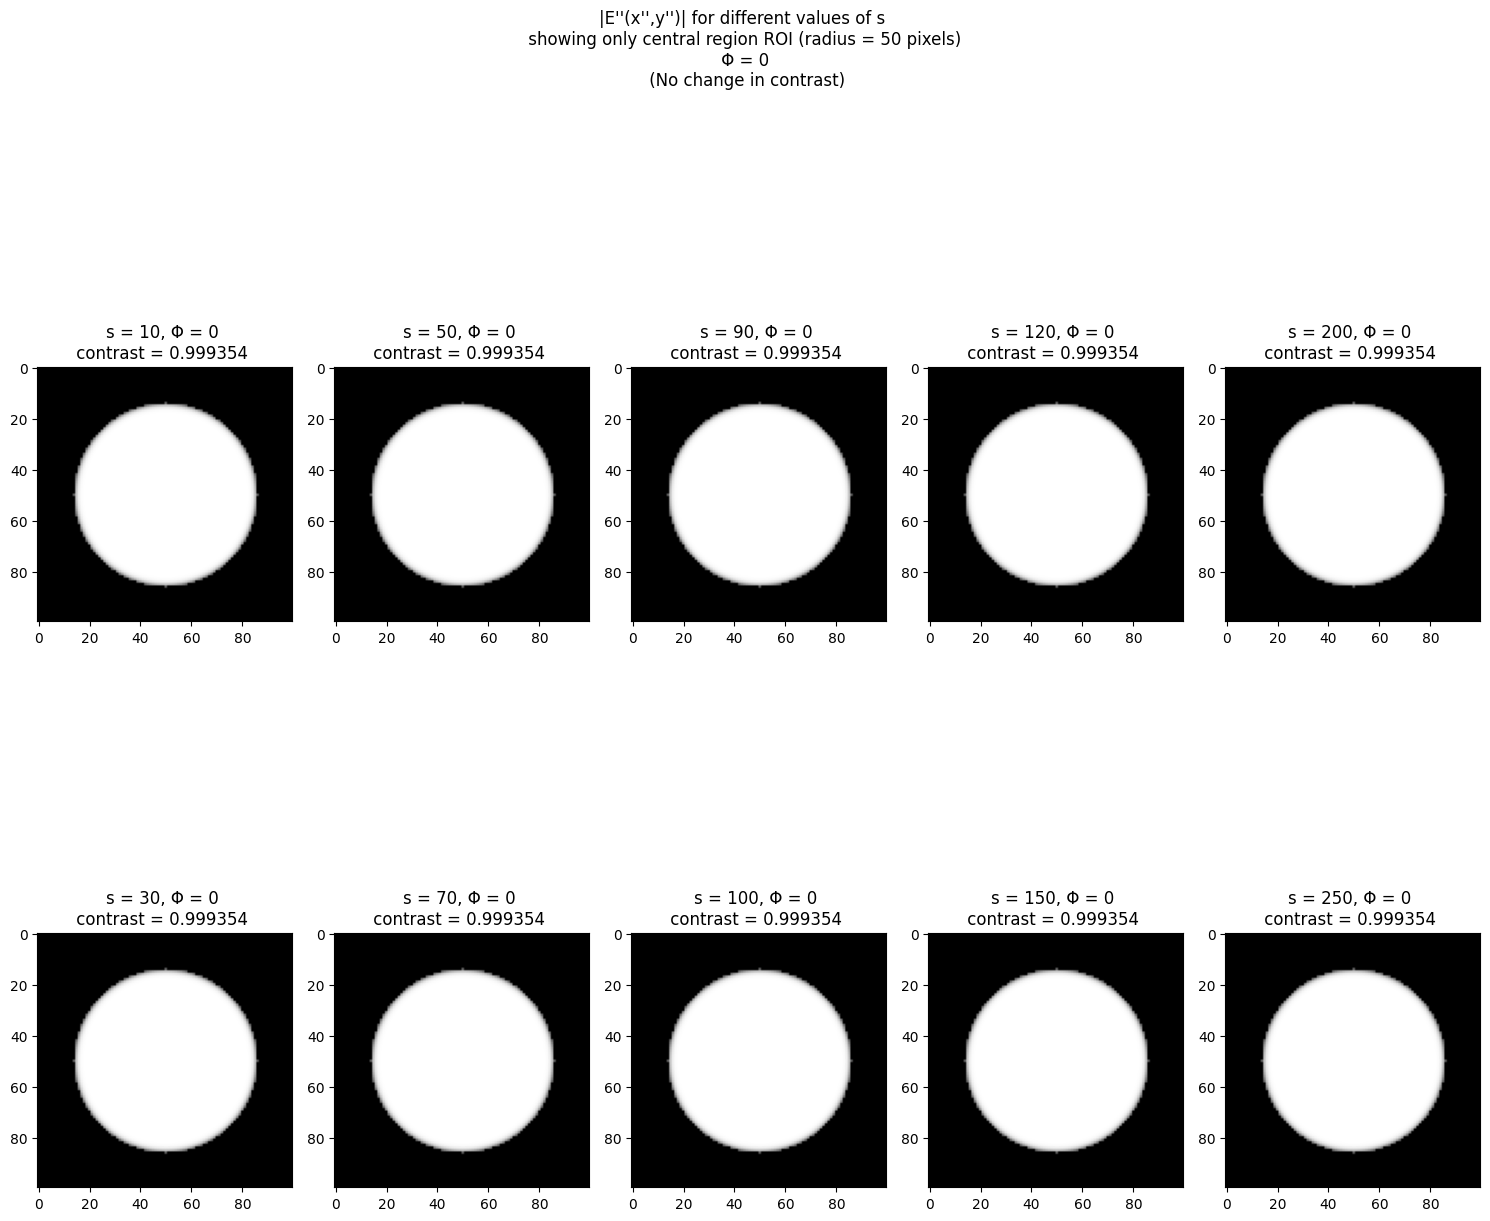

In [39]:
## 2. For phi = 0

s = [10,30,50,70,90,100,120,150,200,250]
c_value_0 = []
center = (256, 256)
radius = 13
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15,15))
fig.suptitle("|E''(x'',y'')| for different values of s \n showing only central region ROI (radius = 50 pixels) \n Φ = 0 \n (No change in contrast)")
for i in range(len(s)):
    row = i % 2
    col = i // 2
    t = phase_filter( X,Y,s[i], 0)
    E_filtered = t * E_fft
    E_filtered_FT = np.fft.fft2(E_filtered)

    ## Creating a mask to compute contrast only over the ROI(r = 50 pixels)
    mask = np.zeros(abs(E_filtered_FT).shape[:2], dtype=np.uint8)
    cv2.circle(mask, center, radius, 1, -1)
    masked_img = cv2.bitwise_and(abs(E_filtered_FT) , abs(E_filtered_FT) , mask=mask)

    #Irradiance
    irradiance = (masked_img) ** 2
    min_v = np.min(irradiance[irradiance>0])
    max_v = np.max(irradiance)

    #Contrast
    contrast = round((max_v - min_v) / (max_v + min_v),6)
    c_value_0.append(contrast)
    axes[row, col].imshow(np.abs(E_filtered_FT)[N//2-50:N//2+50,N//2-50:N//2+50], cmap='gray')
    axes[row, col].set_title("s = {}, Φ = 0 \n contrast = {}  ".format(s[i],contrast))

plt.tight_layout()
plt.show()



## Question D and E: "s" Vs "Contrast"

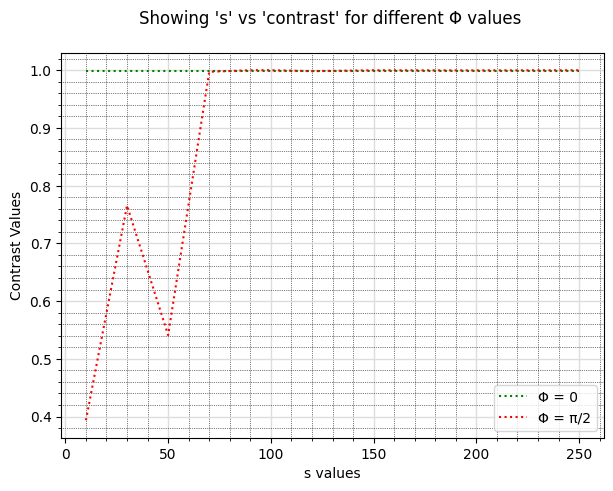

In [40]:
## D, E. Comparing the different values of S and contrasts values for each case i.e. Φ = 0 and Φ = π/2 

fig = plt.figure(figsize=(7,5))
plt.plot(s,c_value_0,color = 'g',linestyle = ':',label = 'Φ = 0')
plt.plot(s, c_value_1, color = 'r',linestyle = ':', label = 'Φ = π/2')
plt.title("Showing 's' vs 'contrast' for different Φ values \n")
plt.grid(which='major', color='#DDDDDD', linewidth=1) 
plt.grid(which='minor', color='black', linestyle=':', linewidth=0.5)
plt.minorticks_on() 
plt.xlabel("s values")
plt.ylabel("Contrast Values")
plt.legend()
plt.show()




#Comments: 

#General:

A 4f Phase Contrast Optical System is an optical system that enhances the contrast of a transparent object having an electric field profile.The way phase filter works is that after light from some source is fourier transformed by first lens it(phase plate) introduces some phase change which result in an interference pattern. These interference patterns are again fourier transformed by next lens producing image with higher contrast in the image plane.

## Observation:
The General Trend that I am seeing from above results is that as the value of "s" i.e. radius of our phase filter function increase the contrast of the output image in fourier plane increases. It may be because as we increase the value of "s" it introduces more "phase change" in our phase object and this distortion appears as intensity change pattern in our fourier plane(Image plane) which result in higher contrast.

##Visuals:
Comparing Visual results, we can see that if we introduce the phase filter with Φ = 0 we dont see any change in contrast  for any value of "s" as expected. However for Φ = π/2, we can see that as the value of "s" increases contrast also increases and at around "s = 70" we get most contrast(visually at least). After this value of "s" the contrast does not improves much which is also shown in plot of "contrast" vs "s" for  both Φ = 0 and Φ = π/2 case.

"But there is difference between visual contrast that i can see and the actual calculated contrast using irradiance value"

#Question 3: Fourier Filtering With a 4-f System; Numerical: Questions A, B and C

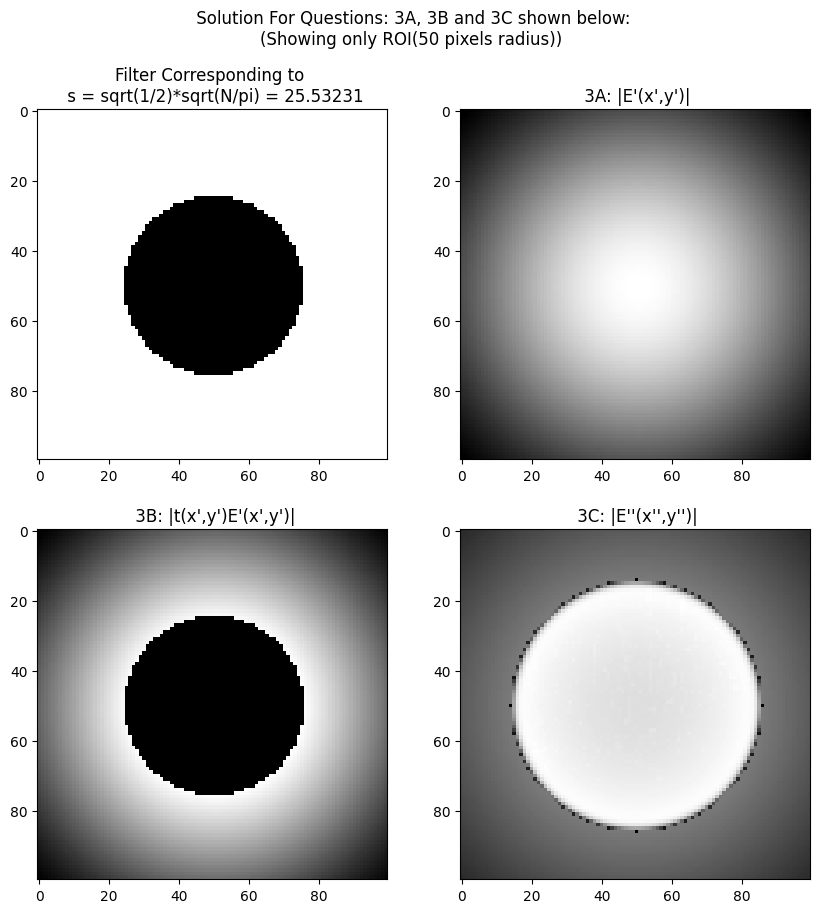

In [41]:
## New Filter: High-Pass Amplitude Filter:

def high_pass_filter(x,y,s):

    r = np.sqrt(x**2 + y**2)
    t = np.zeros_like(x, dtype = np.complex128)
    t[(r) < s] = 0
    t[(r) >= s ] = 1
    return t       

## For s = np.sqrt(1/2)*np.sqrt(N/pi) rendering the grayscale image

s_new =np.sqrt(1/2)*np.sqrt(N/np.pi)
x = np.arange(-N/2, N/2,1)
y = np.arange(-N/2, N/2,1)
X, Y = np.meshgrid(x, y)
hpf = high_pass_filter(X,Y,s_new)
hpf_filtered = hpf * E_fft
hpf_filtered_FT = np.fft.fft2(hpf_filtered)
## Plotting Figures
fig = plt.figure(figsize=(10,10))
plt.suptitle(" Solution For Questions: 3A, 3B and 3C shown below:\n(Showing only ROI(50 pixels radius))")
fig.add_subplot(221)
plt.imshow(abs(hpf)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title("Filter Corresponding to \n s = sqrt(1/2)*sqrt(N/pi) = {}".format(round(s_new,5)))
fig.add_subplot(222)
plt.imshow(np.abs(E_fft)[N//2-50:N//2+50,N//2-50:N//2+50], cmap ='gray')
plt.title(" 3A: |E'(x',y')|")
fig.add_subplot(223)
plt.imshow(np.abs(hpf_filtered)[N//2-50:N//2+50,N//2-50:N//2+50], cmap ='gray')
plt.title(" 3B: |t(x',y')E'(x',y')|")
fig.add_subplot(224)
plt.imshow(np.abs(hpf_filtered_FT)[N//2-50:N//2+50,N//2-50:N//2+50], cmap ='gray')
plt.title(" 3C: |E''(x'',y'')|")
plt.show()

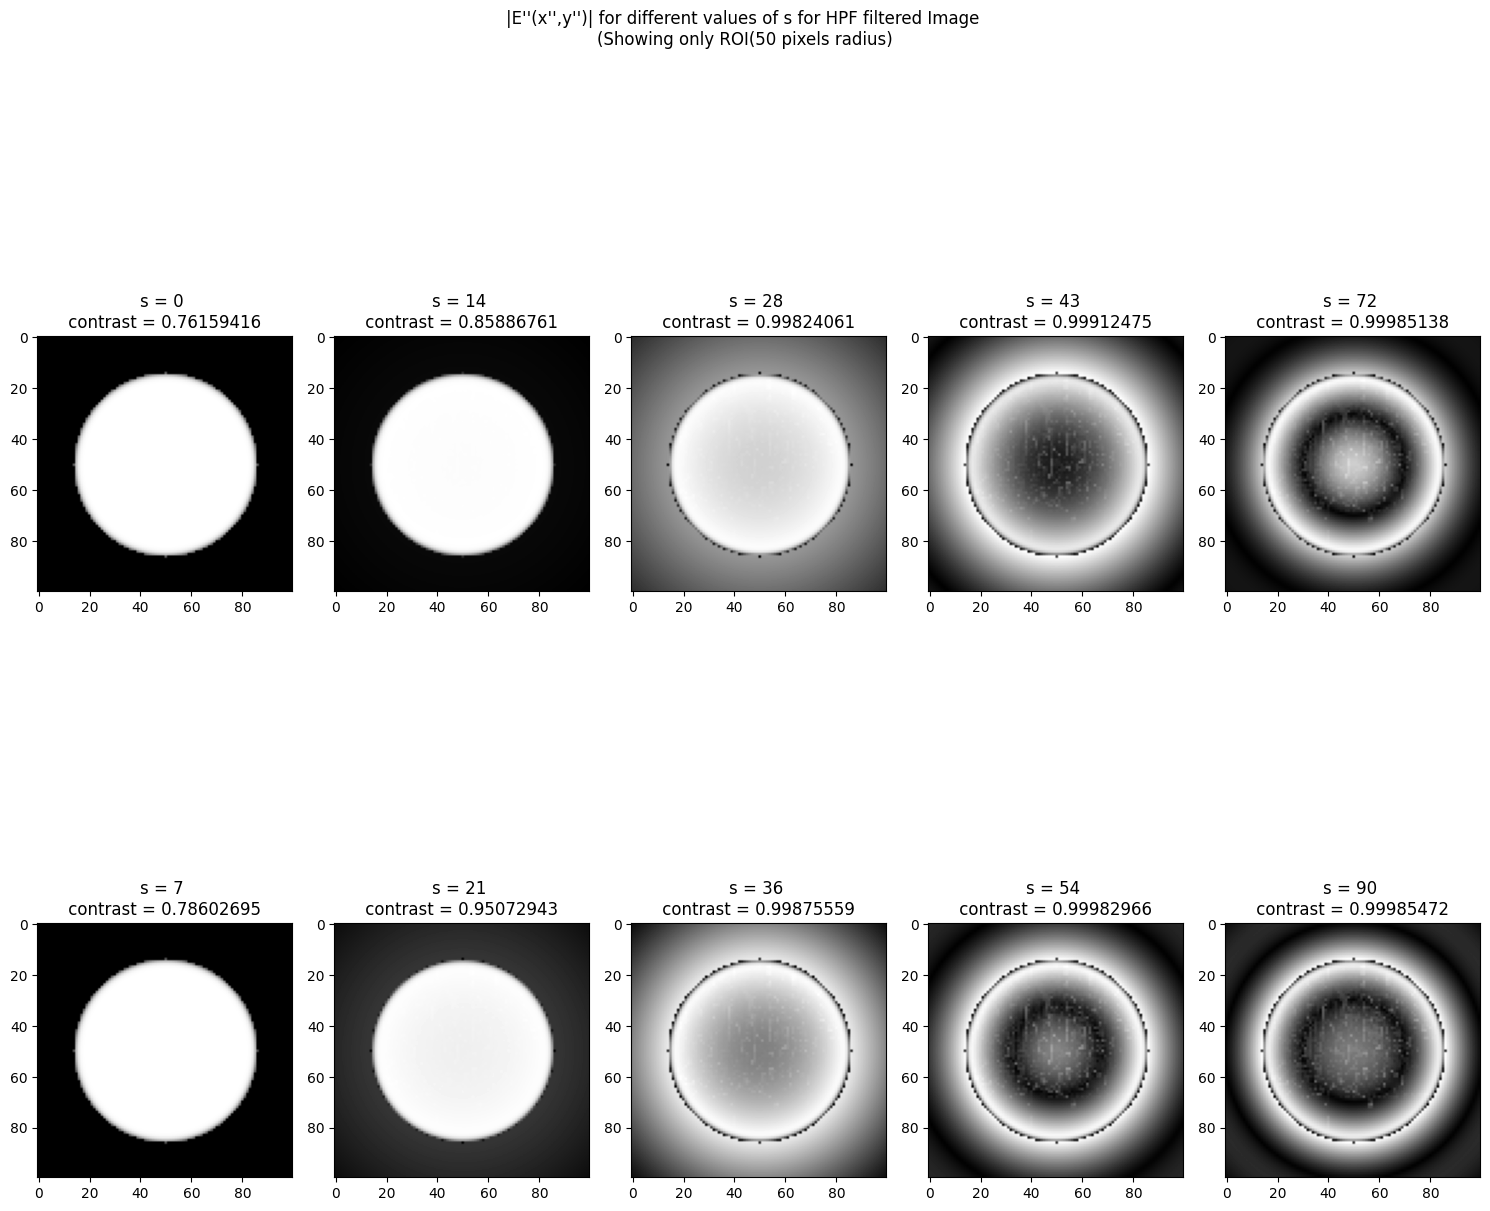

In [42]:
## Question 3D:

N_pi = np.sqrt(N/np.pi)
s_new =[0,0.2*N_pi, 0.4*N_pi,0.6*N_pi,0.8*N_pi,1.0*N_pi,1.2*N_pi, 1.5*N_pi,2*N_pi, 2.5*N_pi ]
c_value_2 = []
center = (N//2, N//2)
radius = int(np.sqrt(N/np.pi))
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15,15))
fig.suptitle("|E''(x'',y'')| for different values of s for HPF filtered Image \n(Showing only ROI(50 pixels radius)")
for i in range(len(s_new)):
    row = i % 2
    col = i // 2
    hpf = high_pass_filter(X,Y,int(s_new[i]))
    hpf_filtered = hpf * E_fft
    hpf_filtered_FT = np.fft.fft2(hpf_filtered)

    ## Creating a mask to compute contrast only over the ROI(r = 25 pixels)
    mask = np.zeros(abs(hpf_filtered_FT).shape[:2], dtype=np.uint8)
    cv2.circle(mask, center, radius, 1, -1)
    masked_img = cv2.bitwise_and(abs(hpf_filtered_FT) , abs(hpf_filtered_FT) , mask=mask)

    #Irradiance
    irrad = (masked_img) ** 2
    min_v = np.min(irrad[irrad>0])
    max_v = np.max(irrad)

    #Contrast
    contrast = round((max_v - min_v) / (max_v + min_v),8)
    c_value_2.append(contrast)
    axes[row, col].imshow((np.abs(hpf_filtered_FT))[N//2-50:N//2+50,N//2-50:N//2+50], cmap='gray')
    axes[row, col].set_title("s = {} \n contrast = {} ".format(int(s_new[i]),contrast))

plt.tight_layout()
plt.show()

##Comment:

From the visual observation I can see that the contrast our image starts to appear after around "s" = 36 which appears to be same as radius of our hyper-gaussian aperture and the calculated contrast doesnt really change much after this value. However, there is clear distinction between images for even greater values of "s" as we can see above.

###High Pass Filter:
The high pass filter removes the low- spatial frequency content of the image and preserve the higher spatial frequency components of the image. This means the resulting image output has high contrast for fine details and edges and overall image is getting darkened. So it produces different image results than using Phase filters.

